In [19]:
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

###load all the datasets
##meta_data file
all_df = pd.read_csv('/Users/eshwarchandrasekharan/Downloads/jan_to_mar_2017_links')
all_df = all_df.fillna(0)

In [20]:
all_df.columns

Index(['buzz_external_id', 'buzz_post_parent_external_id',
       'buzz_post_created_at', 'buzz_account_display_name',
       'buzz_post_type_name', 'buzz_post_buzz_id', 'buzz_campaign_uri',
       'buzz_campaign_name', 'ext_table1_stats_date', 'ext_external_id',
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan', 'ext_table1_firsthour_stats_date',
       'ext_twodays_consumptions_by_type__link_clicks',
       'ext_twodays_stories_by_action_type__share', 'ext_twodays_stats_date'],
      dtype='object')

Without cross-promotion features
Testing for shares!
(23113, 10) (23113,)
(5779, 10) (5779,)


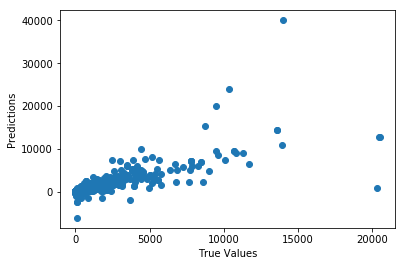

Predict  share
Trial run - Score: 0.623092765797
Cross-validated scores: [ 0.58574515 -1.90901508  0.81924657  0.68514166  0.78219155  0.83491865
  0.72448054  0.7859625   0.78054383  0.83423791]
Mean accuracy =  0.492345329112
Cross-Predicted Accuracy (R2): 0.531375907518
Mean Absolute Error:  154.140654665
Testing for clicks!
(23113, 10) (23113,)
(5779, 10) (5779,)


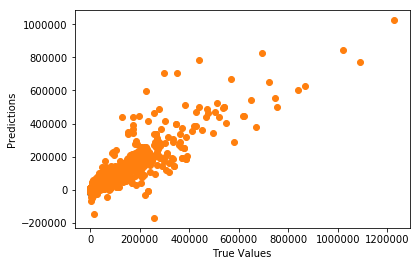

Predict  clicks
Trial run - Score: 0.845489978473
Cross-validated scores: [ 0.83297543 -0.43229179  0.90259319  0.86837836  0.89940635  0.88994726
  0.87484376  0.88849032  0.91308904  0.88872164]
Mean accuracy =  0.752615356992
Cross-Predicted Accuracy (R2): 0.767186937497
Mean Absolute Error:  9326.29711556
                                               0          0
0   ext_table1_consumptions_by_type__link_clicks   3.029927
1  ext_table1_consumptions_by_type__other_clicks  -0.840887
2                ext_table1_reactions_like_total   6.851881
3     ext_table1_stories_by_action_type__comment  11.453068
4        ext_table1_stories_by_action_type__like  -2.960235
5       ext_table1_stories_by_action_type__share  33.338045
6                         ext_table1_engaged_fan   0.373490
7                           ext_table1_fan_reach   0.754137
8                         ext_table1_impressions  -0.235750
9                     ext_table1_impressions_fan  -0.281843


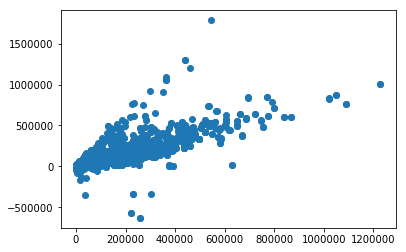

In [21]:
###WITHOUT cross-promotion features
train = all_df

print("Without cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]
# alt_inf = len(all_pages) + 1
# train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
y_share = train['ext_twodays_stories_by_action_type__share']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))

###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))

In [25]:
all_df['buzz_external_id'].shape, all_df['buzz_external_id'].unique().shape

((28892,), (13385,))

In [26]:
#####JAN - MAY 2017: LINKS
import pandas as pd
from pandas.stats.api import ols
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

###load all the datasets
##meta_data file
all_df = pd.read_csv('/Users/eshwarchandrasekharan/Downloads/jan_may_2017_links')
all_df = all_df.fillna(0)

In [27]:
all_df.columns

Index(['buzz_external_id', 'buzz_post_parent_external_id',
       'buzz_post_created_at', 'buzz_account_display_name',
       'buzz_post_type_name', 'buzz_post_buzz_id', 'buzz_campaign_uri',
       'buzz_campaign_name', 'ext_table1_stats_date', 'ext_external_id',
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan', 'ext_table1_firsthour_stats_date',
       'ext_twodays_consumptions_by_type__link_clicks',
       'ext_twodays_stories_by_action_type__share', 'ext_twodays_stats_date'],
      dtype='object')

Without cross-promotion features
Testing for shares!
(46158, 10) (46158,)
(11540, 10) (11540,)


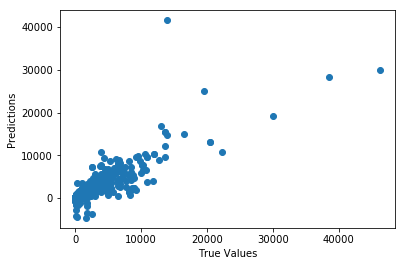

Predict  share
Trial run - Score: 0.782483742185
Cross-validated scores: [ 0.73642017  0.83433102  0.63369094  0.8039965   0.79510588  0.82921337
 -0.55669539  0.84942611  0.79261192  0.85769755]
Mean accuracy =  0.657579806422
Cross-Predicted Accuracy (R2): 0.672643592435
Mean Absolute Error:  129.835452606
Testing for clicks!
(46158, 10) (46158,)
(11540, 10) (11540,)


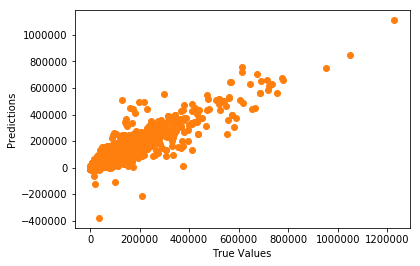

Predict  clicks
Trial run - Score: 0.882932418664
Cross-validated scores: [ 0.88322017  0.90067966  0.88098253  0.8959441   0.92110864  0.90273389
  0.30223907  0.91486469  0.89796318  0.91313833]
Mean accuracy =  0.841287426864
Cross-Predicted Accuracy (R2): 0.844546482045
Mean Absolute Error:  8071.29353953
                                               0          0
0   ext_table1_consumptions_by_type__link_clicks   3.015264
1  ext_table1_consumptions_by_type__other_clicks  -0.390638
2                ext_table1_reactions_like_total   5.843742
3     ext_table1_stories_by_action_type__comment  10.959402
4        ext_table1_stories_by_action_type__like  -2.942473
5       ext_table1_stories_by_action_type__share  44.883092
6                         ext_table1_engaged_fan   0.931498
7                           ext_table1_fan_reach   0.688562
8                         ext_table1_impressions  -0.303188
9                     ext_table1_impressions_fan  -0.183651


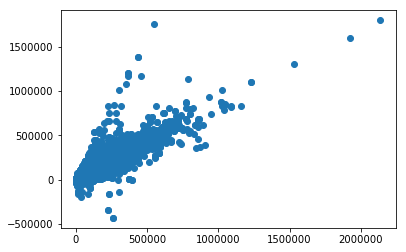

In [28]:
###WITHOUT cross-promotion features
train = all_df

print("Without cross-promotion features")

features = [
       'ext_table1_consumptions_by_type__link_clicks',
       'ext_table1_consumptions_by_type__other_clicks',
       'ext_table1_reactions_like_total',
       'ext_table1_stories_by_action_type__comment',
       'ext_table1_stories_by_action_type__like',
       'ext_table1_stories_by_action_type__share', 'ext_table1_engaged_fan',
       'ext_table1_fan_reach', 'ext_table1_impressions',
       'ext_table1_impressions_fan',
               ]
# alt_inf = len(all_pages) + 1
# train = train.replace(math.inf, alt_inf)

# ####add the category variable for each of the pages in col_pages
# for pg in all_pages:
#     features.append(pg)

###generate DFs for analysis - X and Y
df = train[features]

y_clicks = train['ext_twodays_consumptions_by_type__link_clicks']
y_share = train['ext_twodays_stories_by_action_type__share']

metric = 'share'
# metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))

# metric = 'share'
metric = 'clicks'

if metric == 'share':
    y = y_share
    print("Testing for shares!")
else:
    y = y_clicks
    print("Testing for clicks!")

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print("Predict ", metric)
print("Trial run - Score:", model.score(X_test, y_test))

###prediction with cross validation
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# 10-fold CV
scores = cross_val_score(model, df, y, cv = 10)
print("Cross-validated scores:", scores)
print("Mean accuracy = ", scores.mean())


# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=10)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy (R2):", accuracy)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ", mean_absolute_error(y, predictions))

###get coefficients
import numpy as np
print(pd.concat([pd.DataFrame(df.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1))